# Gradient Descent

Implementing Gradient Descent to find the line that best fits and predicts the relation between two variables.

# Dependent Libraries

In [1]:
import numpy as np #math operations
import pandas as pd #read the dataframe

In [2]:
import matplotlib.pyplot as plt #for the visualization

%matplotlib inline

# Dataset

The dataset https://www.kaggle.com/justinas/nba-players-data is imported from Kaggle.

The data set contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds, assists, etc.

From the dataset, player's height and weight has been selected to analyze the relationship.

player_height = player's height in centimeter 

player_weight = player's weight in kilograms

In [3]:
#Reading the csv using pandas

df = pd.read_csv('all_seasons.csv', usecols=['player_height', 'player_weight'])

data = df.to_numpy()
numInstances = data.shape[0]

df.head()

,player_height,player_weight
0,198.12,99.790240
1,215.90,117.933920
2,205.74,95.254320
3,203.20,100.697424
4,205.74,108.862080


Visualizing the data points

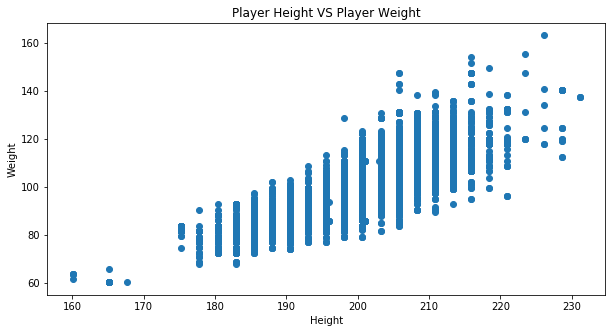

In [5]:
plt.figure(figsize=(10,5))

plt.scatter(x=df.iloc[:,0],y=df.iloc[:,1])
plt.title('Player Height VS Player Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

From the plot, we can see that there exist a positive linear relationship between Height and Weight.

Now, lets find the line that best fits all the data points using Gradient Descent.

# Mathematically,

    the slope of the line would be,
        y = mx + b (where b= y intercept, m= slope, and (x,y)= actual data points.
        
    So, in order to find the best fitting line, we need to find the optimal values of m and b.
    
Now, to measure the accuracy, we need to measure the error by calculating distance of the line with respect to every data points.
Also known as, Measure of Closeness.

---> If the line does not fit the points - Error will be BIG.
---> If the line fits well - Error will be small.
 
 
To reduce the error, we need compute the Sum of Squared Error (SSE) algorithm with the help of actual data, m, and b values.


In [6]:
def SSE(m,b,data):
    
    totalError = 0.0 #intializing with the zero error
    
    for i in range(numInstances):
        
        height = data[i,0] #Row 'i' column 'player height'
        weight = data[i,1] #Row 'i' column 'player weight'
        
        #The real weight
        currentWeight = weight
        
        #Predicted weight with our current fitting line
        #y = mx + b
        currentOutput = m*height + b
        
        #Compute squared error
        currentSquaredError = (currentWeight - currentOutput)**2

        
        #Add it to the total error
        totalError += currentSquaredError

    sse = totalError/numInstances
    
    return totalError

Lets measure the error from the above defined SSE function.

For m=1
    b=2
    
    y = x + 2

In [7]:
m = 1
b = 2

sse = SSE(m,b,data) #Calling the SSE method with above input values

print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

For the fitting line: y = 1x + 2
SSE: 116916613.66


Now, let plot the line with above input m and b

# Plotting

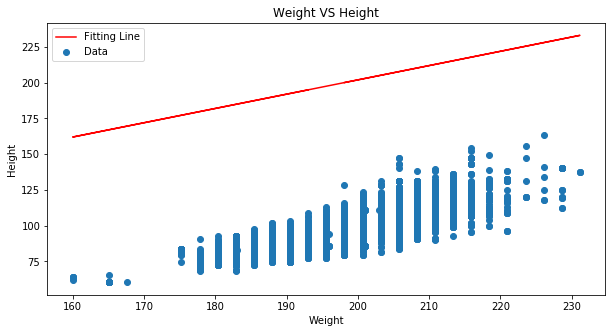

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.scatter(x=data[:,0],y=data[:,1],label='Data')
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Fitting Line')

ax.set_title('Weight VS Height')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.legend(loc='best')

plt.show()

We can say that the approximation of m and b values generated a huge Error and we were not able to fit the best line.

# Implementing Gradient Descent to minimize the Error.


Steps:

1. Create a initial line
2. Update the line parameters in a way that makes the error SMALLER

The 2nd point implies that we need a direction, a way to descend the error valley

The way to go: Compute the partial derivatives respect to 'm' and 'b'. Get the direction that decreases the gradient (towards zero error) and update 'm' and 'b' accordingly

What we need to compute the Gradient Descent:

1. The current 'm' and 'b' to know which is our current fitting line
2. The real data, that corresponds to 'target' on the equation of the image

What will do:
Partial derivatives respect to 'm' and 'b'

#   PARTIAL DERIVATE BY POWER RULE:
        f(x) = x^n
        f'(x) = n * x^n-1

What we will return:
The new 'better' updated 'm' and 'b'

In [10]:
def gradient_descent_step(m,b,data):
    
    N = numInstances
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]

        #Partial derivative respect 'b'
        db = -((2/N) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'm'
        dm = -((2/N) * (y - (m*x + b)))
    
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.0001*m_grad
    b_updated = b - 0.0001*b_grad
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', which acts as a
                    tuning parameter in an optimization algorithm that determines the step size at each iteration while 
                    moving towared local minima.
    '''
    
    return m_updated,b_updated

Lets input the values of m and b to analyze the gradient_descent_step function

    For m=1, b=2

    y = x + 2

In [77]:
m = 1
b = 2

sse = SSE(m,b,data)

print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

for i in range(5):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line: y = 1.00x + 2.00 - Error: 116916613.66
At step 1 - Line: y = 0.98x + -2.10 - Error: 98985962.54
At step 2 - Line: y = 0.96x + -5.87 - Error: 83821572.62
At step 3 - Line: y = 0.94x + -9.34 - Error: 70996677.68
At step 4 - Line: y = 0.93x + -12.53 - Error: 60150351.08
At step 5 - Line: y = 0.91x + -15.46 - Error: 50977348.30

Best  line: y = 0.91x + -15.46 - Error: 50977348.30


# Gradient Descent with n steps to optimize the error.

In [13]:
def gradient_descent_n_steps(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    print('Starting line: y = %.5fx + %.6f - Error: %.6f\n' %(m_starting,b_starting,SSE(m_starting,b_starting,data)))
    m = m_starting
    b = b_starting
    display_freq = steps//10
    for i in range(steps):
        m,b = gradient_descent_step(m,b,data)
        if(i % display_freq == 0):
            sse = SSE(m,b,data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1,m,b,sse))
    
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

# Training with the hyperparameters to analyze the best fit line.

In [111]:
M_STARTING = 2
B_STARTING = 0
NUM_STEPS = 500

In [112]:
m_best,b_best = gradient_descent_n_steps(M_STARTING,B_STARTING,data,NUM_STEPS)

Starting line: y = 2.00000x + 0.000000 - Error: 1010918127.014324

At step 1 - Line: y = 1.939802x + -12.103043 - Error: 855044847.438556
At step 51 - Line: y = 1.261600x + -148.534980 - Error: 757609.455933
At step 101 - Line: y = 1.251557x + -150.651551 - Error: 561303.492126
At step 151 - Line: y = 1.251645x + -150.731889 - Error: 561311.584140
At step 201 - Line: y = 1.251887x + -150.781458 - Error: 561365.023353
At step 251 - Line: y = 1.252131x + -150.830661 - Error: 561418.698109
At step 301 - Line: y = 1.252377x + -150.879961 - Error: 561472.598987
At step 351 - Line: y = 1.252622x + -150.929365 - Error: 561526.726939
At step 401 - Line: y = 1.252869x + -150.978872 - Error: 561581.082920
At step 451 - Line: y = 1.253115x + -151.028484 - Error: 561635.667891

Best  line: y = 1.253358x + -151.077205 - Error: 561635.667891


# Plotting the new best fit line.

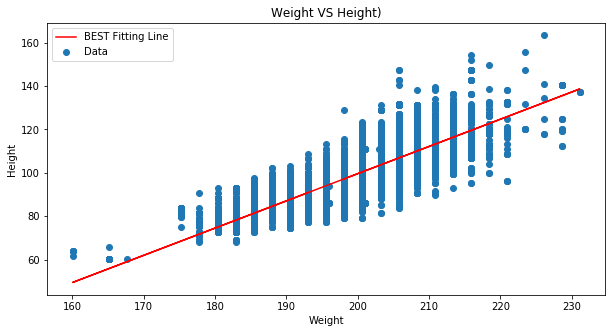

In [113]:
m = m_best
b = b_best
x = data[:,0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Weight VS Height)')
ax.scatter(x=x,y=data[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.legend(loc='best')

plt.show()

# Visualizing Gradient Descent in 3-Demension


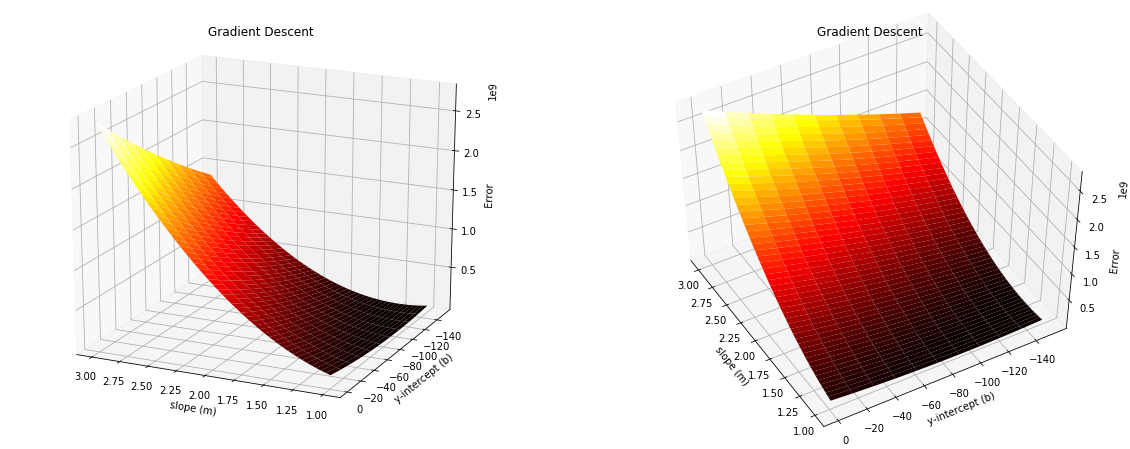

In [114]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def error(x, y):
    return SSE(x,y,data)

m = np.arange(1,3,0.01)
b = np.arange(-151,0,15)


fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')


#PLOT2 - The same plot with different pespective and x,y,z angle.
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')


plt.show()